### CS4423 - Networks
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

#### 3. Random Networks

# Lecture 13: Properties of Random Graphs.

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
# import matplotlib.pyplot as plt

## Probability Distributions

* Denote by $G_n$ the set of *all* graphs on the $n$ points $X = \{0, \dots, n{-}1\}$.

* Regard the ER models $A$ and $B$ as **probability distributions** $P \colon G_n \to \mathbb{R}$.

**Notation:**

* $N = \binom{n}{2}$, the maximal number of edges of a graph $G \in G_n$.

* $m(G)$: the number of edges of a graph $G$.

<div class="alert alert-success">
    
* $G(n,m)$:
$$
P(G) = \begin{cases}
\binom{N}{m}^{-1}, & \text{if } m(G) = m, \\
0, & \text{else.}
\end{cases}
$$

* $G(n, p)$:
$$
P(G) = p^m (1-p)^{N-m},
$$
where $m = m(G)$.
    
</div>

## Expected Values

<div class="alert alert-success">

In $G(n, m)$:

* the expected **size** is
$$
\bar{m} = m,
$$
as every graph $G$ in $G(n, m)$ has exactly $m$ edges.

* the expected **average degree** is 
$$
\langle k \rangle = \frac{2m}{n},
$$
as every graph has average degree $2m/n$.
</div>

* Other properties of $G(n, m)$ are less straightforward, and it is easier to work with 
the $G(n, p)$.  
* However, in the limit (as $n$ grows larger) the differences between the two models
can be neglected.

<div class="alert alert-success">
    
In $G(n, p)$, with $N = \binom{n}{2}$:

* the **expected size** is
$$
\bar{m} = pN
$$

* with **variance**
$$
\sigma_m^2 = N p (1-p);
$$

* the expected **average degree** is
$$
\langle k \rangle = p (n-1).
$$

* with **standard deviation**
$$
\sigma_k = \sqrt{p(1-p)n}
$$

</div>

* In particular, the **relative standard deviation** (or the **coefficient of variation**) of the size of
a random model $B$ graph is
$$
\frac{\sigma_m}{\bar{m}} = \sqrt{\frac{1-p}{pN}} 
= \sqrt{\frac{2(1-p)}{p n (n-1)}}
= \sqrt{\frac{2}{n \langle k \rangle} - \frac{2}{n (n-1)}}
,
$$
a quantity that converges to $0$ as $n \to \infty$ if $p (n-1) = \langle k \rangle$, the average node degree, is kept constant.

* In this sense, for large graphs, the fluctuations in the size of random graphs in model $B$ can be neglected.

## Degree distribution

<div class="alert alert-warning">

**Definition.**
The **degree distribution** $p\colon \mathbb{N}_0 \to \mathbb{R},\, k \mapsto p_k$ of a graph $G$
is defined as
$$
p_k = \frac{n_k}{n},
$$
where, for $k \geq 0$, $n_k$ is the number of nodes of degree $k$ in $G$.
</div>

This definition can be extended to ensembles of graphs with $n$ nodes (like the random graphs $G(n, m)$ and
$G(n, p)$), by setting
$$
p_k = \bar{n}_k/n,
$$
where $\bar{n}_k$ denotes the expected value of the random variable $n_k$ over the ensemble of graphs.

* The degree distribution in a random graph $G(n, p)$ is a **binomial distribution**:
$$
p_k = \binom{n-1}{k}p^k (1-p)^{n-1-k} = \mathrm{Bin}(n-1, p, k)
$$

* In the limit $n \to \infty$, with $\bar{k} = p (n-1)$ kept constant,
the binomial distribution $\mathrm{Bin}(n-1, p, k)$ is well approximated by the
**Poisson distribution**:
$$
p_k = e^{-\lambda} \frac{\lambda^k}{k!} = \mathrm{Pois}(\lambda, k),
$$
where $\lambda = p (n-1)$.

In [2]:
import math
math.factorial(16)

20922789888000

$$\binom{n}{k} = \frac{n \cdot (n-1) \dotsm (n-k+1)}{1 \cdot 2 \dotsm k}$$

In [3]:
def binomial(n, k):
    prod, top, bot = 1, n, 1
    for i in range(k):
        prod = (prod * top) // bot
        top, bot = top - 1, bot + 1
    return prod

In [4]:
l = [binomial(16, k) for k in range(17)]
print(l)

[1, 16, 120, 560, 1820, 4368, 8008, 11440, 12870, 11440, 8008, 4368, 1820, 560, 120, 16, 1]


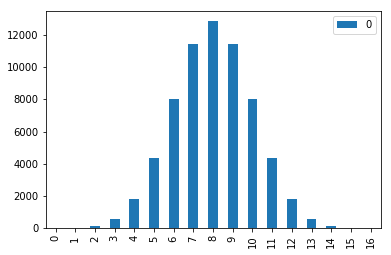

In [9]:
df = pd.DataFrame(l)
df.plot.bar()

For $n$ larger than $k$, Stirlings formula
$$
n! \sim \sqrt{2 \pi n} \left(\tfrac{n}{e}\right)^n
$$
can be used to approximate a binomial coefficient as follows:

$$
\binom{n}{k}  = \frac{n \cdot (n-1) \dots (n-k+1)}{k!}
\approx \frac{(n-k/2)^k}{k^k e^{-k} \sqrt{2 \pi k}}
= \frac{(n/k - 0.5)^k e^k}{\sqrt{2 \pi k}}
$$

In [6]:
from math import exp, sqrt, pi, log
def binom_approx(n, k):
    return (n/k - 0.5)**k * exp(k) / sqrt(2 * pi * k)

In [7]:
n = binomial(100, 2)
k = 50
print(binomial(n, k))

1378313781682866426075244530561354248699471145958987312124273794587365832644708111045663868872218997025383324264236036878


In [8]:
print(binom_approx(n, k))
print(binomial(n, k) / 10**120)

1.3739175898110523e+120
1.3783137816828663


## Phase Transitions

Point of view: for the random graph $G(n, p)$, suppose that $p = p(n)$ is a function of $n$, the number of nodes,
and study the ensemble of graphs $G(n, p(n))$, as $n \to \infty$.

Then, to say that *almost every graph has property $Q$* means that the
probability of a graph in the ensemble to have property $Q$ tends to $1$,
as $n \to \infty$.

<div class="alert alert-danger">
    
**Theorem (Appearance of Subgraphs).**
Let $F$ be a connected graph with $a$ nodes and $b$ edges.
* If $p(n)/n^{-a/b} \to 0$ then almost every graph in the ensemble $G(n, p(n))$ does not contain a copy of $F$.
* If $p(n)/n^{-a/b} \to \infty$ then almost every graph in the ensemble $G(n, p(n))$ does contain a copy of $F$.
* If $p(n) = c n^{-a/b}$ then, as $n \to \infty$, the number $n_F$ of $F$-subgraphs in $G$ has distribution
$\mathrm{Pois}(\lambda, r)$, where $\lambda = c^b/|\mathrm{Aut(F)}|$,
with $|\mathrm{Aut}(F)|$ being the number of *automorphisms* of $F$.
</div>

For example:

* Trees with $a$ nodes appear when $p(n) = c n^{-a/(a-1)}$.
* Cycles of order $a$ appear when $p(n) = c n^{-1}$.
* Complete subgraphs of order $a$ appear when $p(n) = c n^{-2/(a-1)}$.

* Moreover, $p(n) = \frac1n \ln n$ is the threshold probability for $G$ to be connected.
(This corresponds to $m = \frac12 n \ln n$ in model $A$.)

Numbers of 
* triads:  $3 \binom{n}{3} p^2 = \tfrac12 n(n-1)(n-2)p^2$,
* triangles: $\binom{n}{3} p^3 = \tfrac16 n(n-1)(n-2)p^3$.

##  The Giant Connected Component

<div class="alert alert-warning">
    
**Definition (Giant Component).**
A connected component of a graph $G$ is called a **giant component**
if its number of nodes increases with the order $n$ of $G$ as
some positive power of $n$.
</div>

* In practice, in a given graph $G$ of order $n$, 
a giant component is one of order $n^{2/3}$
(e.g., $100^{2/3} = 21.5$.)

Suppose $p(n) = c/n$ for some positive constant $c$.  (Then the average degree $\langle k \rangle = p (n-1) = c \frac{n-1}{n} \to c$ remains fixed as $n \to \infty$.)

<div class="alert alert-danger">

**Theorem (Erdös-Rényi)**.
* If $c < 1$ the graph contains many small components, orders bounded by $O(\ln n)$.
* If $c = 1$ the graph has large components of order $O(n^{2/3})$.
* If $c > 1$ there is a unique **giant component** of order $O(n)$.
<div>

## Code Corner

##  Exercises

1. Design an experiment with random graphs of suitable degree and size to verify the predicted numbers of triads and triangles above.